In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
match_data=pd.read_csv("/content/ContinousDataset.csv")
d3=pd.read_csv("/content/LabelledDataset.csv")
originalDataset_df=pd.read_csv("/content/originalDataset.csv")

In [ ]:
match_data.head()

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second


In [ ]:
d2.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [ ]:
d3.head()

,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_Bermuda,Team 1_Canada,Team 1_East Africa,Team 1_England,Team 1_Hong Kong,Team 1_India,Team 1_Ireland,...,Innings_Team1_Second,Innings_Team2_First,Innings_Team2_Second,Venue_Team1_Away,Venue_Team1_Home,Venue_Team1_Neutral,Venue_Team2_Away,Venue_Team2_Home,Venue_Team2_Neutral,Winner
0,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,Australia
1,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,0,England
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,Australia
3,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,0,England
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,New Zealand


In [ ]:
print(match_data.shape)
print(d2.shape)
print(d3.shape)

(7494, 13)
(3932, 7)
(7494, 218)


In [ ]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     7494 non-null   int64 
 1   Scorecard      7494 non-null   object
 2   Team 1         7494 non-null   object
 3   Team 2         7494 non-null   object
 4   Margin         7494 non-null   object
 5   Ground         7494 non-null   object
 6   Match Date     7494 non-null   object
 7   Winner         7494 non-null   object
 8   Host_Country   7364 non-null   object
 9   Venue_Team1    7494 non-null   object
 10  Venue_Team2    7494 non-null   object
 11  Innings_Team1  7494 non-null   object
 12  Innings_Team2  7494 non-null   object
dtypes: int64(1), object(12)
memory usage: 761.2+ KB


In [ ]:
unique_teams = match_data["Winner"].unique()
print(unique_teams)

['Australia' 'England' 'New Zealand' 'West Indies' 'Pakistan' 'India'
 'Sri Lanka' 'Zimbabwe' 'South Africa' 'Kenya' 'U.A.E.' 'Bangladesh'
 'Canada' 'Netherlands' 'Bermuda' 'Ireland' 'Scotland' 'Afghanistan'
 'P.N.G.' 'Hong Kong' 'Namibia' 'U.S.A.' 'East Africa']


In [ ]:
len(unique_teams)

23

In [ ]:
winner_count = match_data.loc[:,["Winner","Scorecard"]].groupby("Winner").count()
winner_count["Percentage"] = round(winner_count["Scorecard"]*100/winner_count["Scorecard"].sum(),0);
winner_count = winner_count.sort_values("Scorecard",ascending=False)
winner_count

,Scorecard,Percentage
Winner,,
Australia,1104,15.0
India,950,13.0
Pakistan,932,12.0
West Indies,760,10.0
Sri Lanka,742,10.0
South Africa,722,10.0
England,686,9.0
New Zealand,648,9.0
Zimbabwe,258,3.0


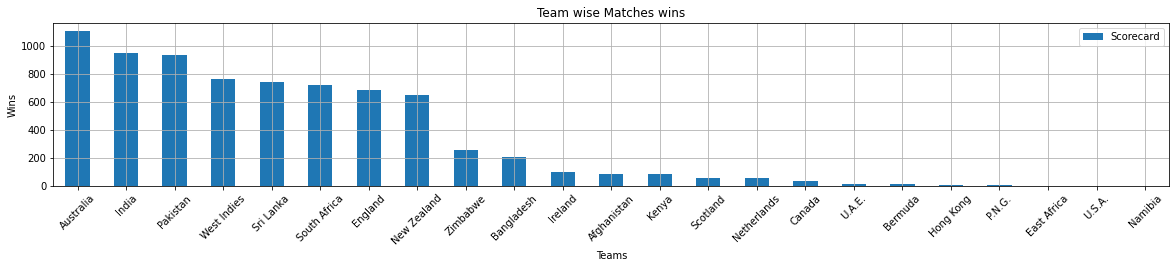

In [ ]:
winner_count.iloc[:,0:1].plot(kind="bar",figsize=(20,3))
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.title("Team wise Matches wins")
plt.grid()
plt.show()

In [ ]:
team_wise_matches_info = pd.DataFrame(columns=["TeamName","MatchesPlayed","MatchesWon","WonPercentage","LossPercentage","Total_Home_Played","Total_Home_Wins","Home_Wins%","Home_Innings_1st_1st","Home_Innings_1st_2nd","Home_Innings_2nd_1st","Home_Innings_2nd_2nd","Total_Away_Played","Total_Away_Wins","Away_Wins%","Away_Innings_1st_1st","Away_Innings_1st_2nd","Away_Innings_2nd_1st","Away_Innings_2nd_2nd"])
team_wise_matches_info

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd


In [ ]:
def team_statistics(team,i):
    #Calculating the total matches played by a team
    total_matches_played = match_data[(match_data["Team 1"] == team) | (match_data["Team 2"] == team)]
    total_matches_played_rows,total_matches_played_columns = total_matches_played.shape
   
    #Calculating the total matches won by a team
    total_matches_won = match_data[((match_data["Team 1"] == team) | (match_data["Team 2"] == team)) & (match_data["Winner"] == team)]
    total_matches_won_rows, total_matches_won_columns = total_matches_won.shape
    
    #Calculating the total matches played by a team at Home Country
    total_home_played = match_data[((match_data["Team 1"] == team) | (match_data["Team 2"] == team)) & (match_data["Host_Country"] == team)]
    total_home_played_rows, total_home_played_columns = total_home_played.shape
    
    #Calculating the total matches won by a team at Home Country
    team_home_won = match_data[((match_data["Team 1"] == team) | (match_data["Team 2"] == team)) & (match_data["Winner"] == team) & (match_data["Host_Country"] == team)]
    team_home_won_rows,team_home_won_columns = team_home_won.shape
    
    #Calculating the total matches won by a team1 in First Innings at Home Country 
    team_home_innings1_1st_country_won = match_data[(match_data["Team 1"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] == team) & (match_data["Innings_Team1"] == "First")]
    team_home_innings1_1st_country_won_rows,team_home_innings1_1st_country_won_columns = team_home_innings1_1st_country_won.shape
    
    #Calculating the total matches won by a team1 in Second Innings at Home Country 
    team_home_innings1_2nd_country_won = match_data[(match_data["Team 1"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] == team) & (match_data["Innings_Team1"] == "Second")]
    team_home_innings1_2nd_country_won_rows,team_home_innings1_2nd_country_won_columns = team_home_innings1_2nd_country_won.shape
  
    #Calculating the total matches won by a team2 in First Innings at Home Country 
    team_home_innings2_1st_country_won = match_data[(match_data["Team 2"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] == team) & (match_data["Innings_Team2"] == "First")]
    team_home_innings2_1st_country_won_rows,team_home_innings2_1st_country_won_columns = team_home_innings2_1st_country_won.shape
    
    #Calculating the total matches won by a team2 in Second Innings at Home Country 
    team_home_innings2_2nd_country_won = match_data[(match_data["Team 2"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] == team) & (match_data["Innings_Team2"] == "Second")]
    team_home_innings2_2nd_country_won_rows,team_home_innings2_2nd_country_won_columns = team_home_innings2_2nd_country_won.shape
   
    #Calculating the total matches played by a team at Away Country
    total_away_played = match_data[((match_data["Team 1"] == team) | (match_data["Team 2"] == team)) & (match_data["Host_Country"] != team)]
    total_away_played_rows, total_away_played_columns = total_away_played.shape
    
    #Calculating the total matches won by a team at Away Country
    team_away_won = match_data[((match_data["Team 1"] == team) | (match_data["Team 2"] == team)) & (match_data["Winner"] == team) & (match_data["Host_Country"] != team)]
    team_away_won_rows,team_away_won_columns = team_away_won.shape
    
    #Calculating the total matches won by a team1 in First Innings at Away Country
    team_away_innings1_1st_country_won = match_data[(match_data["Team 1"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] != team) & (match_data["Innings_Team1"] == "First")]
    team_away_innings1_1st_country_won_rows,team_away_innings1_1st_country_won_columns = team_away_innings1_1st_country_won.shape
   
    #Calculating the total matches won by a team1 in Second Innings at Away Country 
    team_away_innings1_2nd_country_won = match_data[(match_data["Team 1"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] != team) & (match_data["Innings_Team1"] == "Second")]
    team_away_innings1_2nd_country_won_rows,team_away_innings1_2nd_country_won_columns = team_away_innings1_2nd_country_won.shape
    
    #Calculating the total matches won by a team2 in First Innings at Away Country 
    team_away_innings2_1st_country_won = match_data[(match_data["Team 2"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] != team) & (match_data["Innings_Team2"] == "First")]
    team_away_innings2_1st_country_won_rows,team_away_innings2_1st_country_won_columns = team_away_innings2_1st_country_won.shape
    
    #Calculating the total matches won by a team2 in Second Innings at Away Country 
    team_away_innings2_2nd_country_won = match_data[(match_data["Team 2"] == team) & (match_data["Winner"] == team) & (match_data["Host_Country"] != team) & (match_data["Innings_Team2"] == "Second")]
    team_away_innings2_2nd_country_won_rows,team_away_innings2_2nd_country_won_columns = team_away_innings2_2nd_country_won.shape
        
    team_wise_matches_info.at[i,"TeamName"] = team
    team_wise_matches_info.at[i,"MatchesPlayed"] = total_matches_played_rows
    team_wise_matches_info.at[i,"MatchesWon"] = total_matches_won_rows
    team_wise_matches_info.at[i,"WonPercentage"] = round(total_matches_won_rows*100/total_matches_played_rows,2)
    team_wise_matches_info.at[i,"LossPercentage"] = 100-round(total_matches_won_rows*100/total_matches_played_rows,2)
    team_wise_matches_info.at[i,"Total_Home_Played"] = total_home_played_rows
    team_wise_matches_info.at[i,"Total_Home_Wins"] = team_home_won_rows
    team_wise_matches_info.at[i,"Home_Innings_1st_1st"] = team_home_innings1_1st_country_won_rows
    team_wise_matches_info.at[i,"Home_Innings_1st_2nd"] = team_home_innings1_2nd_country_won_rows
    team_wise_matches_info.at[i,"Home_Innings_2nd_1st"] = team_home_innings2_1st_country_won_rows
    team_wise_matches_info.at[i,"Home_Innings_2nd_2nd"] = team_home_innings2_2nd_country_won_rows
    team_wise_matches_info.at[i,"Total_Away_Played"] = total_away_played_rows
    team_wise_matches_info.at[i,"Total_Away_Wins"] = team_away_won_rows
    team_wise_matches_info.at[i,"Away_Innings_1st_1st"] = team_away_innings1_1st_country_won_rows
    team_wise_matches_info.at[i,"Away_Innings_1st_2nd"] = team_away_innings1_2nd_country_won_rows
    team_wise_matches_info.at[i,"Away_Innings_2nd_1st"] = team_away_innings2_1st_country_won_rows
    team_wise_matches_info.at[i,"Away_Innings_2nd_2nd"] = team_away_innings2_2nd_country_won_rows
    
    if total_home_played_rows > 0:
         team_wise_matches_info.at[i,"Home_Wins%"] = round(team_home_won_rows*100/total_home_played_rows,2)
    else :
         team_wise_matches_info.at[i,"Home_Wins%"] = 0
            
    if total_away_played_rows > 0:
         team_wise_matches_info.at[i,"Away_Wins%"] = round(team_away_won_rows*100/total_away_played_rows,2)
    else :
         team_wise_matches_info.at[i,"Away_Wins%"] = 0

In [ ]:
i=0

for team in unique_teams:
    data = team_statistics(team,i)
    i=i+1  

In [ ]:
team_wise_matches_info

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128
1,England,1328,686,51.66,48.34,540,320,59.26,65,95,65,95,788,366,46.45,86,97,86,97
2,New Zealand,1372,648,47.23,52.77,542,324,59.78,74,88,74,88,830,324,39.04,88,74,88,74
3,West Indies,1462,760,51.98,48.02,460,258,56.09,50,79,50,79,1002,502,50.1,116,135,116,135
4,Pakistan,1708,932,54.57,45.43,330,202,61.21,49,52,49,52,1378,730,52.98,202,163,202,163
5,India,1760,950,53.98,46.02,590,358,60.68,78,101,78,101,1170,592,50.6,132,164,132,164
6,Sri Lanka,1532,742,48.43,51.57,422,274,64.93,63,74,63,74,1110,468,42.16,128,106,128,106
7,Zimbabwe,948,258,27.22,72.78,378,116,30.69,23,35,23,35,570,142,24.91,39,32,39,32
8,South Africa,1122,722,64.35,35.65,458,336,73.36,86,82,86,82,664,386,58.13,101,92,101,92
9,Kenya,298,84,28.19,71.81,110,46,41.82,9,14,9,14,188,38,20.21,10,9,10,9


In [ ]:
team_wise_matches_info = team_wise_matches_info.sort_values(["MatchesPlayed","MatchesWon"],ascending=False)
team_wise_matches_info.head()

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
5,India,1760,950,53.98,46.02,590,358,60.68,78,101,78,101,1170,592,50.6,132,164,132,164
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128
4,Pakistan,1708,932,54.57,45.43,330,202,61.21,49,52,49,52,1378,730,52.98,202,163,202,163
6,Sri Lanka,1532,742,48.43,51.57,422,274,64.93,63,74,63,74,1110,468,42.16,128,106,128,106
3,West Indies,1462,760,51.98,48.02,460,258,56.09,50,79,50,79,1002,502,50.1,116,135,116,135


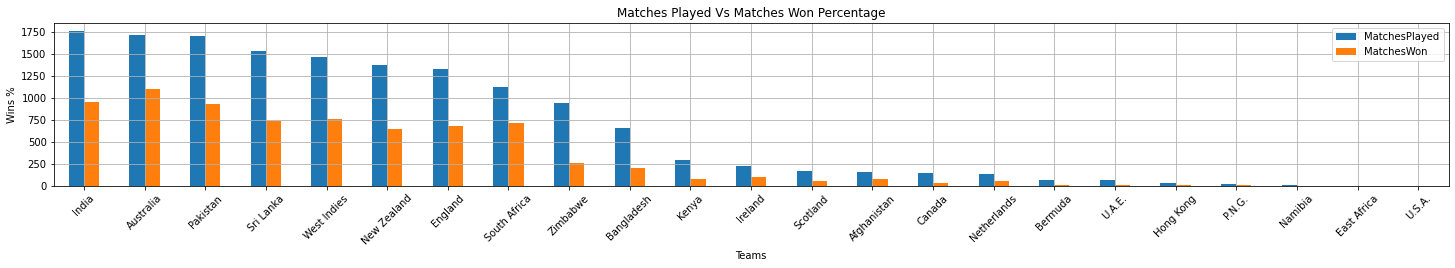

In [ ]:
team_wise_matches_info.iloc[:,0:3].plot(kind="bar",x="TeamName",figsize=(25,3))
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Wins %")
plt.title("Matches Played Vs Matches Won Percentage")
plt.grid()
plt.show()

Text(0.5, 1.0, 'Matches Won Percentage')

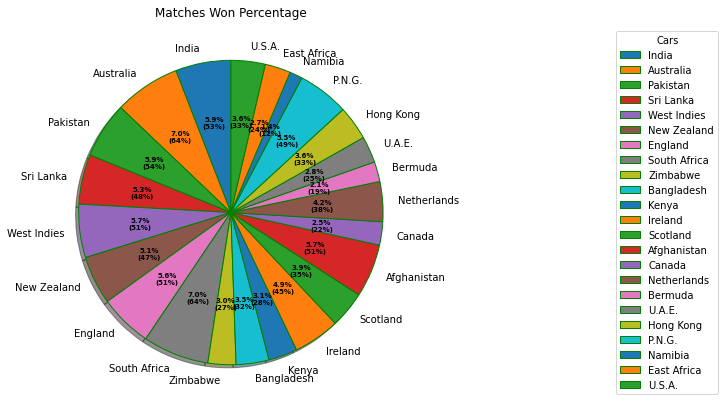

In [ ]:
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d}%)".format(pct, absolute)

explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0) 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 

fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(team_wise_matches_info["WonPercentage"],autopct = lambda pct: func(pct, team_wise_matches_info["WonPercentage"]),labels = team_wise_matches_info["TeamName"],shadow = True,startangle = 90,wedgeprops = wp, textprops = dict(color ="black"))

ax.legend(wedges, team_wise_matches_info["TeamName"],title ="Cars",loc ="center left", bbox_to_anchor =(1.5, 0, 0.5, 1)) 

plt.setp(autotexts, size = 7, weight ="bold") 
ax.set_title("Matches Won Percentage")

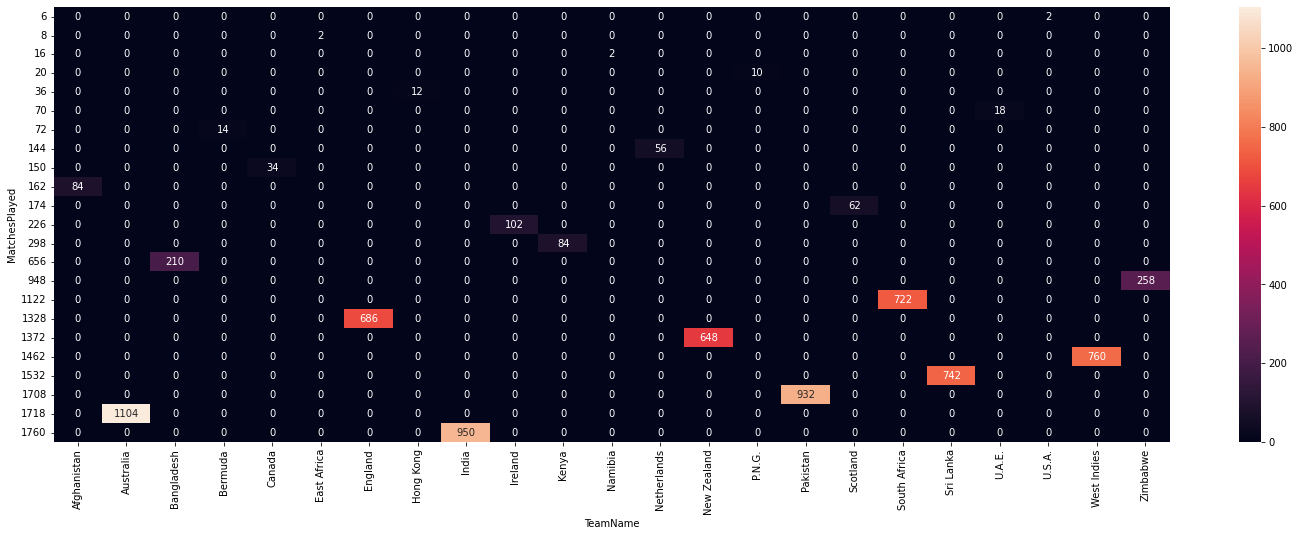

In [ ]:
team_wise_matches_info_won_details  = pd.pivot_table(team_wise_matches_info,index=["MatchesPlayed"],columns="TeamName",values="MatchesWon",fill_value=0,aggfunc=sum)
plt.figure(figsize=(25,8))
sns.heatmap(team_wise_matches_info_won_details,annot=True,fmt=".0f")
plt.show()

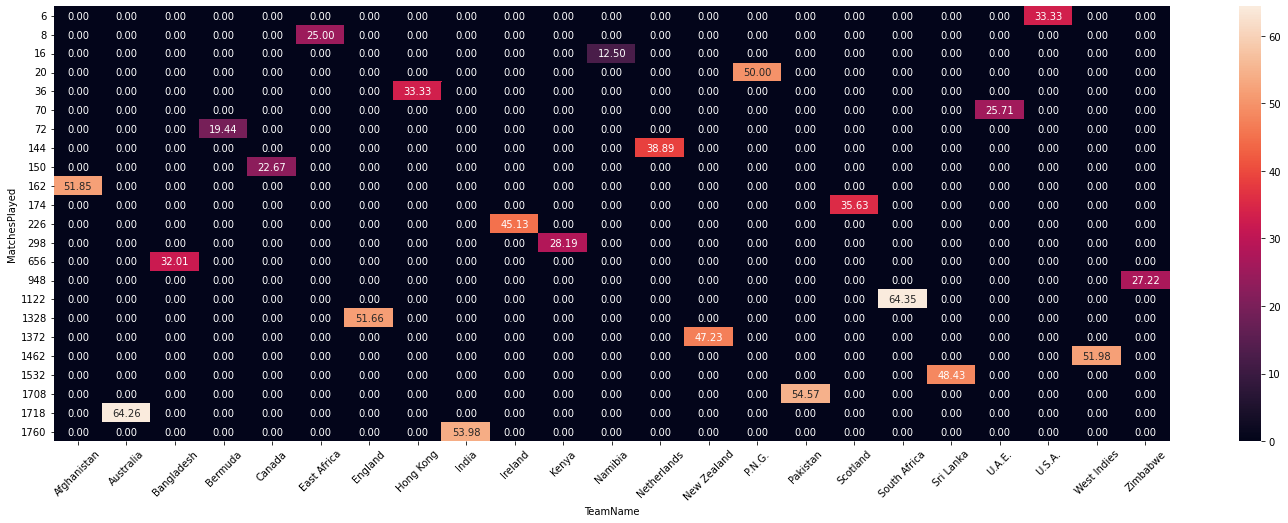

In [ ]:
team_wise_matches_info_won_details  = pd.pivot_table(team_wise_matches_info,index=["MatchesPlayed"],columns="TeamName",values="WonPercentage",fill_value=0,aggfunc=sum)
plt.figure(figsize=(25,8))
sns.heatmap(team_wise_matches_info_won_details,annot=True,fmt="1.02f")
plt.xticks(rotation=45)
plt.show()

In [ ]:
ground_wise_team_won_data = match_data[match_data["Host_Country"] == "India"].pivot_table(index="Ground",columns="Winner",values="Scorecard",fill_value=0,aggfunc="count")
ground_wise_team_won_data

Winner,Afghanistan,Australia,Bangladesh,Canada,East Africa,England,India,Ireland,Kenya,Namibia,New Zealand,Pakistan,South Africa,Sri Lanka,U.S.A.,West Indies,Zimbabwe
Ground,,,,,,,,,,,,,,,,,
Ahmedabad,0,6,0,0,0,4,14,0,0,0,4,2,4,4,0,10,0
Amritsar,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
Bengaluru,0,8,0,0,0,4,26,2,0,0,0,2,0,0,0,0,0
Chandigarh,0,2,0,0,0,2,6,0,0,0,0,0,0,0,0,0,0
Chennai,0,8,0,0,0,4,14,0,2,0,2,4,0,0,0,2,0
Cuttack,0,2,0,0,0,6,24,0,0,0,2,0,0,2,0,0,0
Delhi,0,4,0,2,0,4,24,0,0,0,2,2,2,2,0,4,0
Dharamsala,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,0,0
Faridabad,0,2,0,0,0,0,4,0,0,0,0,0,4,0,0,4,2


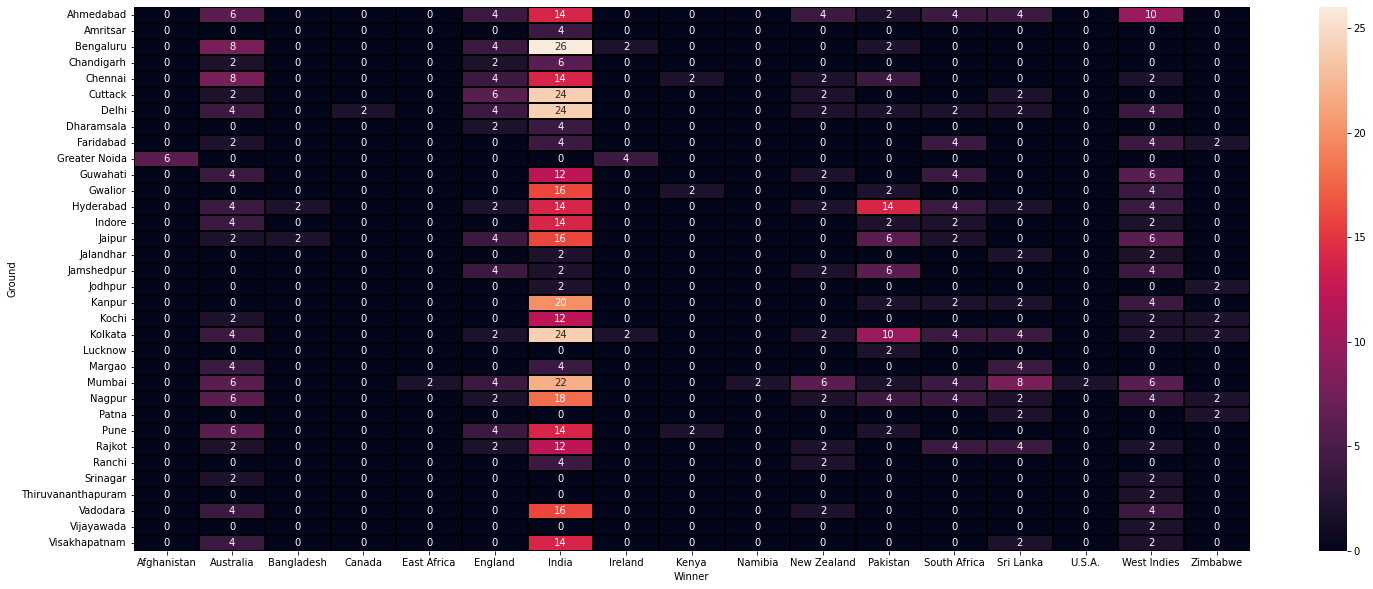

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(ground_wise_team_won_data,linecolor='black',linewidth=1,annot=True, fmt=".0f")
plt.show()

In [ ]:
ground_wise_team_won_data = match_data.pivot_table(index="Ground",columns="Winner",values="Scorecard",fill_value=0,aggfunc="count")
ground_wise_team_won_data

Winner,Afghanistan,Australia,Bangladesh,Bermuda,Canada,East Africa,England,Hong Kong,India,Ireland,...,New Zealand,P.N.G.,Pakistan,Scotland,South Africa,Sri Lanka,U.A.E.,U.S.A.,West Indies,Zimbabwe
Ground,,,,,,,,,,,,,,,,,,,,,
Aberdeen,0,0,0,0,2,0,2,0,0,2,...,4,0,0,12,0,0,0,0,0,0
Abu Dhabi,0,6,0,0,0,0,6,2,2,0,...,8,2,32,2,6,4,4,0,0,0
Adelaide,0,68,2,0,0,0,8,0,16,0,...,18,0,8,0,8,10,0,0,22,0
Ahmedabad,0,6,0,0,0,0,4,0,14,0,...,4,0,2,0,4,4,0,0,10,0
Albion,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vijayawada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
Visakhapatnam,0,4,0,0,0,0,0,0,14,0,...,0,0,0,0,0,2,0,0,2,0
Wellington,0,16,0,0,0,0,2,0,6,0,...,52,0,8,0,6,8,0,0,4,0


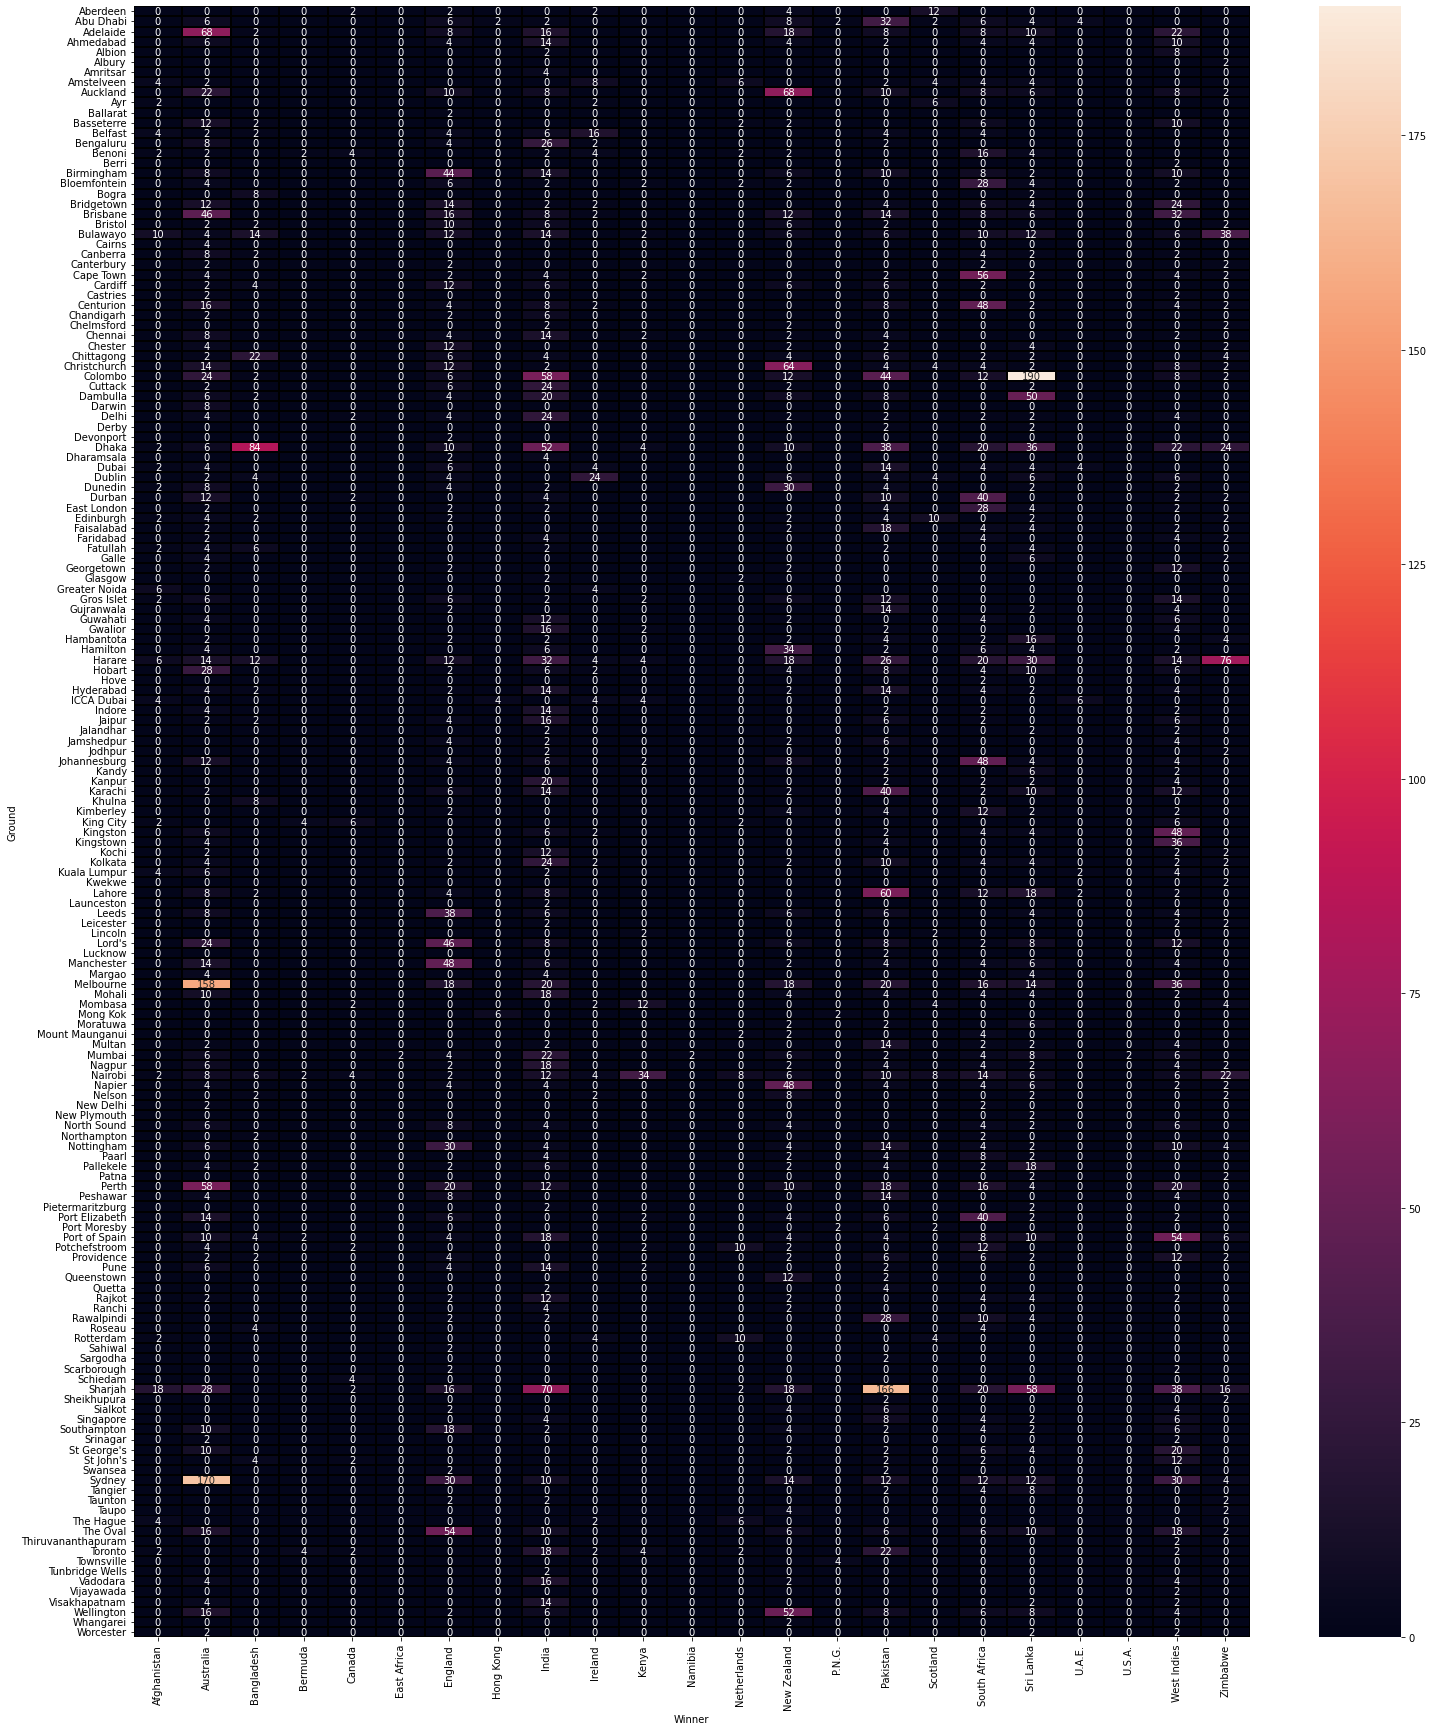

In [ ]:
plt.figure(figsize=(25,30))
sns.heatmap(ground_wise_team_won_data,linecolor='black',linewidth=1,annot=True, fmt=".0f")
plt.show()

In [ ]:
team_wise_matches_info.head()

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
5,India,1760,950,53.98,46.02,590,358,60.68,78,101,78,101,1170,592,50.6,132,164,132,164
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128
4,Pakistan,1708,932,54.57,45.43,330,202,61.21,49,52,49,52,1378,730,52.98,202,163,202,163
6,Sri Lanka,1532,742,48.43,51.57,422,274,64.93,63,74,63,74,1110,468,42.16,128,106,128,106
3,West Indies,1462,760,51.98,48.02,460,258,56.09,50,79,50,79,1002,502,50.1,116,135,116,135


In [ ]:
team_wise_matches_info.sort_values("MatchesPlayed",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
5,India,1760,950,53.98,46.02,590,358,60.68,78,101,78,101,1170,592,50.6,132,164,132,164


In [ ]:
team_wise_matches_info.sort_values("MatchesWon",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128


In [ ]:
team_wise_matches_info.sort_values("WonPercentage",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
8,South Africa,1122,722,64.35,35.65,458,336,73.36,86,82,86,82,664,386,58.13,101,92,101,92


In [ ]:
team_wise_matches_info.sort_values("Total_Home_Played",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128


In [ ]:
team_wise_matches_info.sort_values("Total_Home_Wins",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128


In [ ]:
team_wise_matches_info.sort_values("Home_Wins%",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
19,Hong Kong,36,12,33.33,66.67,8,6,75.0,2,1,2,1,28,6,21.43,2,1,2,1


In [ ]:
team_wise_matches_info.sort_values("Total_Away_Played",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
4,Pakistan,1708,932,54.57,45.43,330,202,61.21,49,52,49,52,1378,730,52.98,202,163,202,163


In [ ]:
team_wise_matches_info.sort_values("Total_Away_Wins",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
4,Pakistan,1708,932,54.57,45.43,330,202,61.21,49,52,49,52,1378,730,52.98,202,163,202,163


In [ ]:
team_wise_matches_info.sort_values("Away_Wins%",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128


In [ ]:
match_data_df = team_wise_matches_info

In [ ]:
match_data_df

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
5,India,1760,950,53.98,46.02,590,358,60.68,78,101,78,101,1170,592,50.6,132,164,132,164
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128
4,Pakistan,1708,932,54.57,45.43,330,202,61.21,49,52,49,52,1378,730,52.98,202,163,202,163
6,Sri Lanka,1532,742,48.43,51.57,422,274,64.93,63,74,63,74,1110,468,42.16,128,106,128,106
3,West Indies,1462,760,51.98,48.02,460,258,56.09,50,79,50,79,1002,502,50.1,116,135,116,135
2,New Zealand,1372,648,47.23,52.77,542,324,59.78,74,88,74,88,830,324,39.04,88,74,88,74
1,England,1328,686,51.66,48.34,540,320,59.26,65,95,65,95,788,366,46.45,86,97,86,97
8,South Africa,1122,722,64.35,35.65,458,336,73.36,86,82,86,82,664,386,58.13,101,92,101,92
7,Zimbabwe,948,258,27.22,72.78,378,116,30.69,23,35,23,35,570,142,24.91,39,32,39,32
11,Bangladesh,656,210,32.01,67.99,312,128,41.03,29,35,29,35,344,82,23.84,19,22,19,22


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, tree

match_data_df.TeamName = pd.Categorical(match_data_df.TeamName)
match_data_df["TeamName"] = match_data_df.TeamName.cat.codes

match_data_df

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
5,8,1760,950,53.98,46.02,590,358,60.68,78,101,78,101,1170,592,50.6,132,164,132,164
0,1,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128
4,15,1708,932,54.57,45.43,330,202,61.21,49,52,49,52,1378,730,52.98,202,163,202,163
6,18,1532,742,48.43,51.57,422,274,64.93,63,74,63,74,1110,468,42.16,128,106,128,106
3,21,1462,760,51.98,48.02,460,258,56.09,50,79,50,79,1002,502,50.1,116,135,116,135
2,13,1372,648,47.23,52.77,542,324,59.78,74,88,74,88,830,324,39.04,88,74,88,74
1,6,1328,686,51.66,48.34,540,320,59.26,65,95,65,95,788,366,46.45,86,97,86,97
8,17,1122,722,64.35,35.65,458,336,73.36,86,82,86,82,664,386,58.13,101,92,101,92
7,22,948,258,27.22,72.78,378,116,30.69,23,35,23,35,570,142,24.91,39,32,39,32
11,2,656,210,32.01,67.99,312,128,41.03,29,35,29,35,344,82,23.84,19,22,19,22


In [ ]:
pred_columns = match_data_df[:]
prediction_var = pred_columns.columns
print(list(prediction_var))

['TeamName', 'MatchesPlayed', 'MatchesWon', 'WonPercentage', 'LossPercentage', 'Total_Home_Played', 'Total_Home_Wins', 'Home_Wins%', 'Home_Innings_1st_1st', 'Home_Innings_1st_2nd', 'Home_Innings_2nd_1st', 'Home_Innings_2nd_2nd', 'Total_Away_Played', 'Total_Away_Wins', 'Away_Wins%', 'Away_Innings_1st_1st', 'Away_Innings_1st_2nd', 'Away_Innings_2nd_1st', 'Away_Innings_2nd_2nd']


In [ ]:
train,test = train_test_split(match_data_df,test_size=0.2)
print(train.shape)
print(test.shape)

(18, 19)
(5, 19)


In [ ]:
train_X = train[prediction_var]
train_Y = train["TeamName"]
print(list(train.columns))

test_X = train[prediction_var]
test_Y = train["TeamName"]

['TeamName', 'MatchesPlayed', 'MatchesWon', 'WonPercentage', 'LossPercentage', 'Total_Home_Played', 'Total_Home_Wins', 'Home_Wins%', 'Home_Innings_1st_1st', 'Home_Innings_1st_2nd', 'Home_Innings_2nd_1st', 'Home_Innings_2nd_2nd', 'Total_Away_Played', 'Total_Away_Wins', 'Away_Wins%', 'Away_Innings_1st_1st', 'Away_Innings_1st_2nd', 'Away_Innings_2nd_1st', 'Away_Innings_2nd_2nd']


In [ ]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(train_X,train_Y).predict(test_X)

In [ ]:
cnf_matrix_gnb = metrics.confusion_matrix(test_Y,y_pred_gnb)
print(cnf_matrix_gnb)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


In [ ]:
print(metrics.accuracy_score(test_Y,y_pred_gnb))

1.0


In [ ]:
model = RandomForestClassifier(n_estimators=5)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print(round(metrics.accuracy_score(test_Y,prediction),2))

1.0


In [ ]:
d3.head()

,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_Bermuda,Team 1_Canada,Team 1_East Africa,Team 1_England,Team 1_Hong Kong,Team 1_India,Team 1_Ireland,...,Innings_Team1_Second,Innings_Team2_First,Innings_Team2_Second,Venue_Team1_Away,Venue_Team1_Home,Venue_Team1_Neutral,Venue_Team2_Away,Venue_Team2_Home,Venue_Team2_Neutral,Winner
0,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,Australia
1,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,0,England
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,Australia
3,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,0,England
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,New Zealand


In [ ]:
label_df=d3

In [ ]:
label_df.isna().sum()

Team 1_Afghanistan     0
Team 1_Australia       0
Team 1_Bangladesh      0
Team 1_Bermuda         0
Team 1_Canada          0
                      ..
Venue_Team1_Neutral    0
Venue_Team2_Away       0
Venue_Team2_Home       0
Venue_Team2_Neutral    0
Winner                 0
Length: 218, dtype: int64

In [ ]:
lben= LabelEncoder()

label_df["Winner"] = lben.fit_transform(label_df["Winner"])
label_df.head()

,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_Bermuda,Team 1_Canada,Team 1_East Africa,Team 1_England,Team 1_Hong Kong,Team 1_India,Team 1_Ireland,...,Innings_Team1_Second,Innings_Team2_First,Innings_Team2_Second,Venue_Team1_Away,Venue_Team1_Home,Venue_Team1_Neutral,Venue_Team2_Away,Venue_Team2_Home,Venue_Team2_Neutral,Winner
0,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,0,6
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,13


In [ ]:
labels = label_df.pop("Winner")

In [ ]:
label_df.head()

,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_Bermuda,Team 1_Canada,Team 1_East Africa,Team 1_England,Team 1_Hong Kong,Team 1_India,Team 1_Ireland,...,Innings_Team1_First,Innings_Team1_Second,Innings_Team2_First,Innings_Team2_Second,Venue_Team1_Away,Venue_Team1_Home,Venue_Team1_Neutral,Venue_Team2_Away,Venue_Team2_Home,Venue_Team2_Neutral
0,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(label_df, labels,test_size=0.25,random_state = 25)

In [ ]:
rfc = RandomForestClassifier(n_estimators= 10, criterion="entropy")
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[ 10,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   0,   2],
       [  0, 201,   0,   0,   0,   0,  11,   0,   9,   0,   0,   0,   0,
         10,   0,   7,   0,  10,   2,   0,  15,   0],
       [  3,   0,  30,   0,   1,   0,   2,   0,   4,   0,   2,   0,   0,
          1,   0,   3,   1,   4,   2,   0,   1,   3],
       [  0,   0,   0,   1,   2,   0,   0,   0,   0,   0,   2,   0,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   1,   4,   0,   0,   0,   0,   2,   2,   0,   1,
          0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  15,   0,   0,   1,   0,  90,   0,   8,   0,   1,   0,   0,
          9,   0,   8,   1,   6,   4,   0,   7,   1],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 

In [ ]:
originalDataset_df.isna().sum()

Scorecard       0
Team 1          0
Team 2          0
Winner          0
Margin        179
Ground          0
Match Date      0
dtype: int64

In [ ]:
originalDataset_df = originalDataset_df.dropna(how="any")

In [ ]:
originalDataset_df

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [ ]:
team_name = input("Enter Team Name = ")
df = originalDataset_df[((originalDataset_df["Team 1"] == team_name) | (originalDataset_df["Team 2"] == team_name))]
idx = (df['Team 2'] == team_name)
df.head()

Enter Team Name = India


,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
11,ODI # 12,England,India,England,4 wickets,Leeds,"Jul 13, 1974"
12,ODI # 13,England,India,England,6 wickets,The Oval,"Jul 15-16, 1974"
18,ODI # 19,England,India,England,202 runs,Lord's,"Jun 7, 1975"
23,ODI # 24,East Africa,India,India,10 wickets,Leeds,"Jun 11, 1975"
27,ODI # 28,India,New Zealand,New Zealand,4 wickets,Manchester,"Jun 14, 1975"


In [ ]:
df.loc[idx,['Team 1','Team 2']] = df.loc[idx,['Team 2','Team 1']].values
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
11,ODI # 12,India,England,England,4 wickets,Leeds,"Jul 13, 1974"
12,ODI # 13,India,England,England,6 wickets,The Oval,"Jul 15-16, 1974"
18,ODI # 19,India,England,England,202 runs,Lord's,"Jun 7, 1975"
23,ODI # 24,India,East Africa,India,10 wickets,Leeds,"Jun 11, 1975"
27,ODI # 28,India,New Zealand,New Zealand,4 wickets,Manchester,"Jun 14, 1975"


In [ ]:
head_to_head_matches_count = df.pivot_table(index="Team 2",columns="Team 1",values="Winner",fill_value=0,aggfunc="count")
head_to_head_matches_count.sort_values(team_name,ascending=False)

Team 1,India
Team 2,
Sri Lanka,142
Pakistan,123
Australia,118
West Indies,117
New Zealand,95
England,91
South Africa,74
Zimbabwe,61
Bangladesh,32


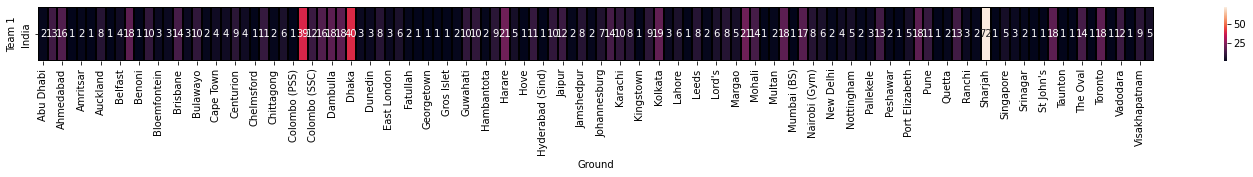

In [ ]:
india_ground_level_won_df = df.pivot_table(index="Team 1",columns="Ground",values="Scorecard",fill_value=0,aggfunc="count")
india_ground_level_won_df.head()
plt.figure(figsize=(25,1))
sns.heatmap(india_ground_level_won_df,linecolor='black',linewidth=1,annot=True, fmt=".0f")
plt.show()

Enter Ground Name = Abu Dhabi


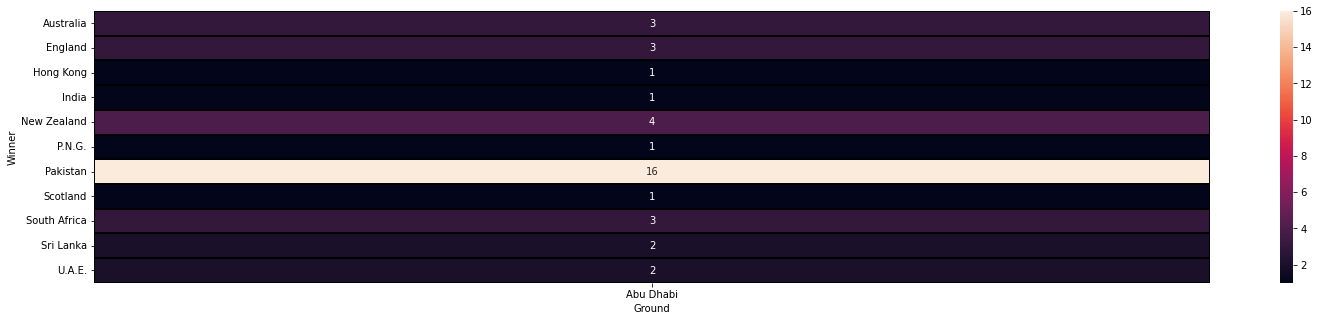

In [ ]:
ground_name = input("Enter Ground Name = ")
ground_level_won_df = originalDataset_df[(originalDataset_df["Ground"]==ground_name)].pivot_table(index="Winner",columns="Ground",values="Scorecard",fill_value=0,aggfunc="count")
ground_level_won_df.head()
plt.figure(figsize=(25,5))
sns.heatmap(ground_level_won_df,linecolor='black',linewidth=1,annot=True, fmt=".0f")
plt.show()

In [ ]:
head_to_head_matches_count = originalDataset_df.pivot_table(index="Team 1",columns="Team 2",values="Winner",fill_value=0,aggfunc="count")
head_to_head_matches_count

Team 2,Afghanistan,Asia XI,Australia,Bangladesh,Bermuda,Canada,East Africa,England,Hong Kong,ICC World XI,...,New Zealand,P.N.G.,Pakistan,Scotland,South Africa,Sri Lanka,U.A.E.,U.S.A.,West Indies,Zimbabwe
Team 1,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,1,1,0,3,0,1,1,0,...,0,0,2,7,0,2,1,0,0,5
Africa XI,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Asia XI,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Australia,1,0,0,13,0,2,0,73,0,3,...,78,0,84,3,50,65,0,1,90,20
Bangladesh,4,0,6,0,2,2,0,13,1,0,...,21,0,24,3,11,22,1,0,16,39
Bermuda,0,0,0,0,0,5,0,0,0,0,...,0,0,0,1,0,1,0,0,1,2
Canada,2,0,0,0,6,0,0,1,0,0,...,3,0,2,6,0,1,0,0,3,2
East Africa,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
England,0,0,59,7,0,1,1,0,0,0,...,44,0,60,1,30,46,1,0,55,14


In [ ]:
CategoricalDataset=pd.read_csv("/content/CategoricalDataset.csv")
CategoricalDataset.head()

,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_Bermuda,Team 1_Canada,Team 1_East Africa,Team 1_England,Team 1_Hong Kong,Team 1_India,Team 1_Ireland,...,Winner_New Zealand,Winner_P.N.G.,Winner_Pakistan,Winner_Scotland,Winner_South Africa,Winner_Sri Lanka,Winner_U.A.E.,Winner_U.S.A.,Winner_West Indies,Winner_Zimbabwe
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
label_df = pd.read_csv("/content/LabelledDataset.csv")

In [ ]:
scaler.fit(label_df.drop("Winner",axis=1))

StandardScaler()

In [ ]:
scaler_features = scaler.transform(label_df.drop("Winner",axis=1))

In [ ]:
df_label = pd.DataFrame(scaler_features,columns=label_df.columns[:-1])

In [ ]:
scaler.fit(label_df.drop("Winner",axis=1))

StandardScaler()

In [ ]:
scaler_features = scaler.transform(label_df.drop("Winner",axis=1))

In [ ]:
df_label = pd.DataFrame(scaler_features,columns=label_df.columns[:-1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaler_features,label_df["Winner"],test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[  6   3   2   0   1   0   0   0   1   1   3   0   0   0   0   0   0   1
    0   3   5]
 [  0 190   0   0   0  19   0  21   0   0   1  13   0  13   0  14  16   0
    0  25   4]
 [  0   1  37   0   1   1   0  11   1   0   0   3   0   6   0   1   2   0
    0   7   3]
 [  0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   1   0   3   4   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   1   1]
 [  0  29   0   0   0 103   0  19   0   0   0  11   0  13   0   5  12   0
    0  18   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   1   0   0   0   0
    0   0   0]
 [  0  38   1   0   0   9   0 126   1   0   0  13   0  28   0  11  35   0
    0  17   6]
 [  3   5   1   0   1   1   0   3  11   0   0   0   0   0   3   0   0   0
    0   0   0]
 [  0   0   1   0   0   1   0   3   2  11   1   1   0   0   1   0   1   0
    0   0   3]
 [  1   1   0   0   0   0   0   2   0   2   4   0   0   0   0   1   2   0
    0   1   2]
 [  0  16   2   0   1

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

 Afghanistan       0.35      0.23      0.28        26
   Australia       0.50      0.60      0.55       316
  Bangladesh       0.49      0.50      0.49        74
     Bermuda       0.20      0.50      0.29         2
      Canada       0.29      0.36      0.32        11
     England       0.50      0.49      0.50       210
   Hong Kong       0.00      0.00      0.00         3
       India       0.41      0.44      0.43       285
     Ireland       0.50      0.39      0.44        28
       Kenya       0.73      0.44      0.55        25
 Netherlands       0.36      0.25      0.30        16
 New Zealand       0.50      0.45      0.47       192
      P.N.G.       0.50      0.75      0.60         4
    Pakistan       0.50      0.50      0.50       278
    Scotland       0.50      0.21      0.29        24
South Africa       0.63      0.52      0.57       216
   Sri Lanka       0.43      0.44      0.43       231
      U.A.E.       0.50    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(y_test != pred_i))

Text(0, 0.5, 'Error Rate')

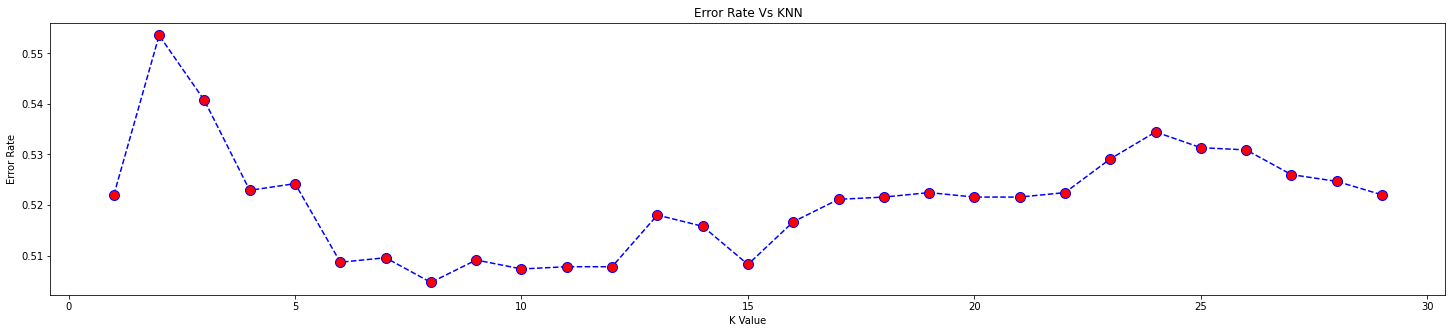

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(range(1,30),error_rate,color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate Vs KNN")
plt.xlabel("K Value")
plt.ylabel("Error Rate")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 13   1   0   0   2   0   0   2   0   0   4   0   0   2   0   1   0   0
    0   1   0]
 [  1 182   1   0   0  23   0  15   2   0   0  13   0  20   0  17  15   0
    0  25   2]
 [  0   3  30   0   0   0   0  19   1   0   0   1   0   5   0   1   2   0
    0   8   4]
 [  0   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   1   0   4   0   0   0   1   0   3   0   0   0   0   1   0   0   0
    0   1   0]
 [  1  28   1   0   0 102   0  23   1   0   0  12   0  15   1   7   6   0
    0  13   0]
 [  0   0   0   0   0   0   2   0   0   0   0   0   0   1   0   0   0   0
    0   0   0]
 [  0  14   1   0   0  14   0 165   0   1   0   8   0  38   0   9  17   0
    0  18   0]
 [  2   2   0   0   0   2   0   2   8   2   2   0   0   1   3   2   2   0
    0   0   0]
 [  0   1   1   0   0   0   0   6   0   9   0   0   0   2   0   2   0   0
    0   0   4]
 [  1   2   0   0   1   0   0   2   2   2   3   0   0   1   0   2   0   0
    0   0   0]
 [  0  29   5   0   0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
